<h1 align= "center"> Deloitte Machine Learning Challenge </h1>
<h3 align= "center"> Predict If A Person Will Be A Loan Defaulter or Not.  </h3>

<h3 style="color: rgb(233, 80, 92);">
    <strong>Overview</strong>
</h3>

<b>
<p>
Banks run into losses when a customer doesn't pay their loans on time. Because of this, every year, banks have losses in crores, and this also impacts the country's economic growth to a large extent. In this hackathon, we look at various attributes such as funded amount, location, loan, balance, etc., to predict if a person will be a loan defaulter or not. 
</p>

<p>
To solve this problem, MachineHack has created a training dataset of 67,463 rows and 35 columns and a testing dataset of 28,913 rows and 34 columns. The hackathon demands a few pre-requisite skills like big dataset, underfitting vs overfitting, and the ability to optimise “log_loss” to generalise well on unseen data. 
</p>

<h3 style="color: rgb(233, 80, 92);">
    <strong>Evaluation</strong>
</h3>

### <strong> What is the Metric In this competition? </strong>

<b> The submission will be evaluated using the Log Loss metric. One can use sklearn.metric.log_loss to calculate the same.</b>

### 0. Goal

In this Jupyter Notepad, we will be aiming at predicting if a Customer is a Loan Defaulter of Not based on various features.

#### All the Lifecycle in A Data Science Project

1. **Data Analysis / Data Preprocessing**
2. **Feature Engineering**
3. **Feature Selection**
4. **Model Building**
5. **Model Deployment**

### 1. Import relevant Dependencies

Incase you are getting any error saying the package is not installed while running the below cell, then you can use two methods:
- pip install ________.
- google 'How to install ________'.

In [1]:
# Import Dependencies -To see the graphs in the notebook.
%matplotlib inline   

# Python Imports
import math,time,random,datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization -This is where the graphs come in.
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
plt.style.use('fivethirtyeight')

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Display all the columns of the DataFrame.
pd.set_option('display.max_columns', None)

### 2. Loading the required Data

In [2]:
# Import the train and test data.
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# Viewing the train dataset
train.head() # --> First 5 Rows.

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


#### Data Dictionary

| Column | Description/Reference | 
| ------ | ----------- |
| ID | Unique Representative ID |
| Loan Amount | Loan Amount applied |
| Funded Amount | Loan Amount Funded |
| Funded Amount Invester | Loan Amount approved by the Invester |
| Term | Term of loan (months) |
| Batch Enrolled | Batch number of Representative |
| Interest Rate | Interest Rate of the loan |
| Grade | Grade by Bank to the Customer |
| Sub Grade | Sub-Grade by Bank to the Customer |
| Employment Duration | Duration | 
| Home Ownership | Ownership of home |
| Verification Status | Income Verification by Bank |
| Payment Plan | If any Payment Plan has started against loan |
| Loan Title | Title of the loan |
| Debit to Income | Ratio of Representative's Total Monthly Debt Repayment divided by Self Reported Monthly Income (excluding Mortgage) |
| Delinquency - two years | Number of 30+ days Delinquency (Neglect ones duty) in past 2 Years |
| Inquires - six months | Total Number of Inquiries in last 6 Months |
| Open Account | Number of Open Credit line in Representative's credit line |
| Public Record | Number of Derogatory (disrespectful) public records |
| Revolving Balance | Total Credit Revolving balance |
| Revolving Utilities | Amount of credit a Representative is using relative to Revolving Balance |
| Total Accounts | Total Number of Credit lines available in Representatives Credit line |
| Initial List Status | Unique Listing Status of the Loan - W(Waiting), F(Forwarded) |
| Total Received Interest | Total Interest received till Date |
| Total Received Late Fee | Total Late Fee received till Date |
| Recoveries | Post Charge off Gross Recovery |
| Collection Recovery Fee | Post Charge off Collection Fee |
| Collection 12 months Medical | Total Collections in last 12 months excluding Medical Collections |
| Application Type | Indicates when the Representative is an Individual or Joint |
| Last week Pay | Indicates how long (in weeks) a Representative has paid EMI after Batch Enrolled |
| Accounts Delinquent | Number of Accounts on which the Representative is Delinquent |
| Total Collection Amount | Total Collection Amount ever Owed |
| Total Current Balance | Total Current balance from all Accounts |
| Total Revolving Credit Limit | Total Revolving Credit Limit |
| Loan Status | 1 = Defaulter, 0 = Non Defaulters |

<br></br>
___

##### Financial Concepts

1. **Credit Line (https://www.investopedia.com/articles/personal-finance/072913/basics-lines-credit.asp):** A line of credit is a flexible loan from a bank or financial institution. Similar to a credit card that offers you a limited amount of funds—funds that you can use when, if, and how you wish—a line of credit is a defined amount of money that you can access as needed and then repay immediately or over a prespecified period of time.

2. **Revolving Balance (https://www.capitalone.com/learn-grow/money-management/revolving-credit-balance/):** If you don’t pay the balance on your revolving credit account in full every month, the unpaid portion carries over to the next month. That’s called a revolving balance. 

3. **Revolving Credit Limit (https://www.capitalone.com/learn-grow/money-management/revolving-credit-balance/):** If you’re approved for a revolving credit account, like a credit card, the lender will set a credit limit. The credit limit is the maximum amount you can charge to that account.

4. **Credit Limit (https://www.investopedia.com/terms/c/credit_limit.asp):** The term credit limit refers to the maximum amount of credit a financial institution extends to a client. A lending institution extends a credit limit on a credit card or a line of credit. Lenders usually set credit limits based on the information given by the credit-seeking applicant. A credit limit is a factor that affects consumers' credit scores and can impact their ability to obtain credit in the future.

5. **Loan Defaulting (https://www.bankrate.com/glossary/l/loan-default/#:~:text=Defaulting%20on%20a%20loan%20is,he%20defaults%20on%20the%20loan.):** Defaulting on a loan is the failure of a borrower to pay the principal or interest on a security or loan.

6. **Payment Plan (https://www.jifiti.com/glossary/payment-plans/):** A payment plan can refer to paying off any outstanding debt, or sometimes more than one debt by means of consolidation into an organized payment schedule.

7. **How is Revolving Credit Different from Installment?**: https://www.experian.com/blogs/ask-experian/what-is-revolving-credit/#:~:text=A%20revolving%20credit%20account%20sets,or%20%22revolve%22%20the%20balance.

In [4]:
print("Length of the train dataset: ", len(train))
print("Dimensionality of the test dataset: ", test.shape)

Length of the train dataset:  67463
Dimensionality of the test dataset:  (28913, 35)


### 3. Exploratory Data Analysis & Feature Engineering
**PROBLEM:** To Predict the Loan Defaulters based on the information provided in the Test dataset.


In [5]:
## Interchanging the Column names
train.rename(columns= {'Employment Duration': 'Home Ownership', 'Home Ownership': 'Employment Duration'}, inplace=True)
test.rename(columns= {'Employment Duration': 'Home Ownership', 'Home Ownership': 'Employment Duration'}, inplace=True)

In [6]:
train.head()

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Home Ownership,Employment Duration,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,Debt Consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,Debt consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,Debt Consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,Debt consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,Credit card refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [7]:
### Cheking for Duplicate Observations (Train & Test)
print(f"Are there any duplicate values in train data: {train['ID'].duplicated().any()}")
print(f"Are there any duplicate values in test data: {test['ID'].duplicated().any()}")

Are there any duplicate values in train data: False
Are there any duplicate values in test data: False


#### Checking for Missing Value

<AxesSubplot:>

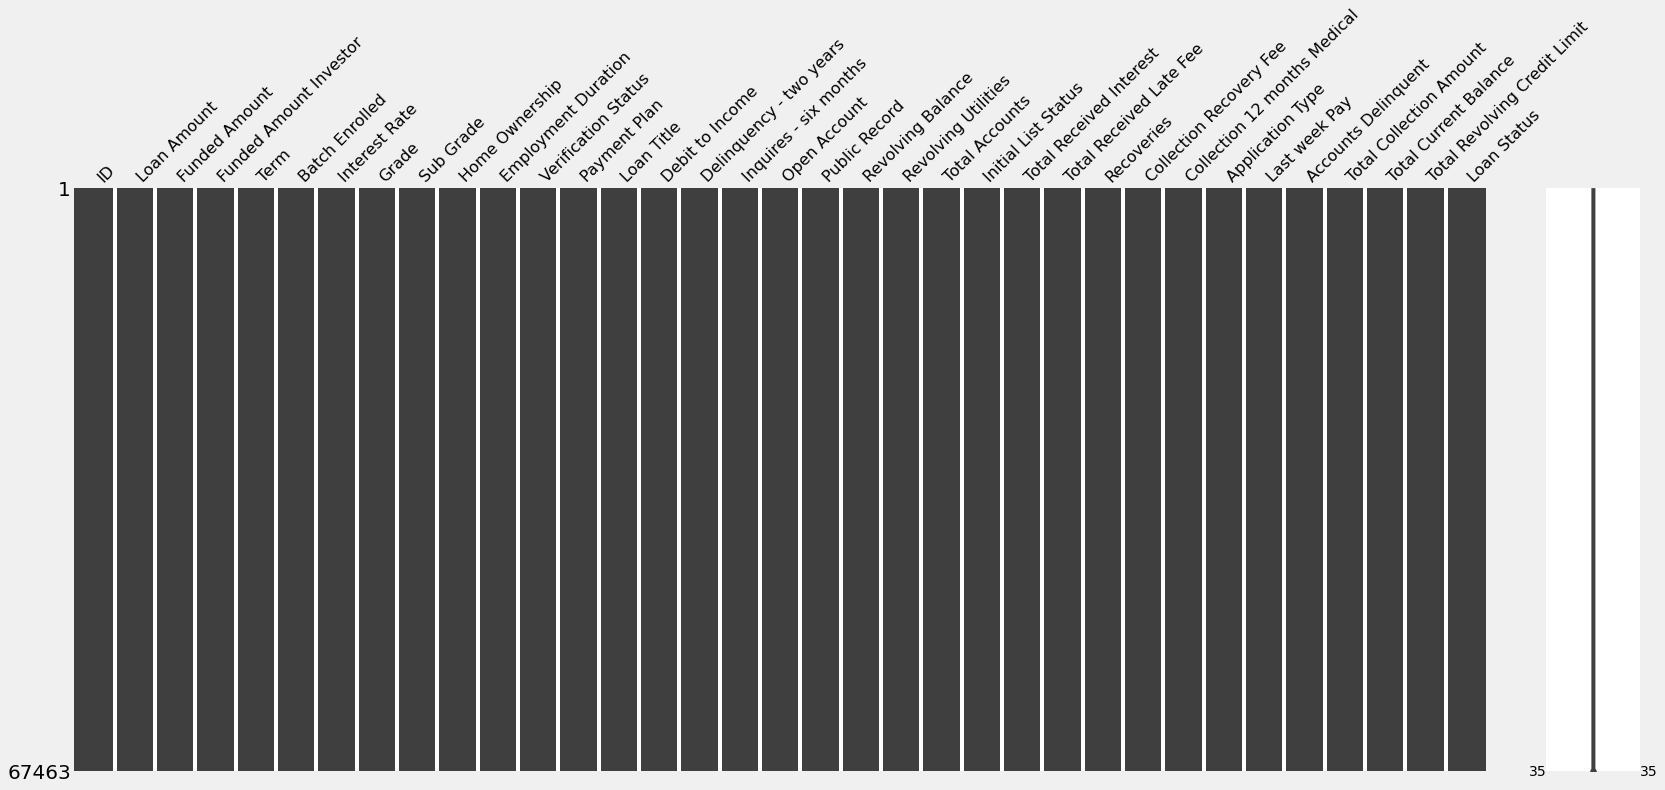

In [8]:
## Visualize
missingno.matrix(train)

In [9]:
## Calculations
for column in train.columns:
    if (train[column].isnull().any() == True):
        print(f"{column} has {train[column].isnull().sum()} missing values.")
else:
    print("No missing values in our Data")

No missing values in our Data


In [10]:
## Validating the below Columns 
print(f"Count of Applied Loan amount that is less than the amount Funded: {train[train['Loan Amount'] < train['Funded Amount']].shape[0]}")
print(f"Count of Applied Loan amount that is less than the amount Approved: {train[train['Loan Amount'] < train['Funded Amount Investor']].shape[0]}")
print(f"Count of Loan amount Approved that is less than the amount Funded: {train[train['Funded Amount Investor'] < train['Funded Amount']].shape[0]}")

Count of Applied Loan amount that is less than the amount Funded: 31166
Count of Applied Loan amount that is less than the amount Approved: 28337
Count of Loan amount Approved that is less than the amount Funded: 35021


- Thus here we can see a mis-match in the data. It is to be noted that in real-life, the "Funded Amount" should neither be greater than the "Loan Amount" applied for nor the approved Loan Amount ("Funded Amount Investor").

##### Data Types of each Column

In [11]:
int_columns = []
float_columns = []
object_columns = []
other_columns = []

for column in train.columns:
    if train[column].dtype == 'object':
        object_columns.append(column)
    elif train[column].dtype == 'int64':
        int_columns.append(column)
    elif train[column].dtype == 'float64':
        float_columns.append(column)
    else:
        other_columns.append(column)

print("INTEGER DATA TYPE")
print(int_columns)
print("-----------------------------------------------------")
print()
print("FLOAT DATA TYPE")
print(float_columns)
print("-----------------------------------------------------")
print()
print("OBJECT DATA TYPE")
print(object_columns)
print("-----------------------------------------------------")
print()
print("ANY OTHER DATA TYPE")
print(other_columns)

INTEGER DATA TYPE
['ID', 'Loan Amount', 'Funded Amount', 'Term', 'Delinquency - two years', 'Inquires - six months', 'Open Account', 'Public Record', 'Revolving Balance', 'Total Accounts', 'Collection 12 months Medical', 'Last week Pay', 'Accounts Delinquent', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Loan Status']
-----------------------------------------------------

FLOAT DATA TYPE
['Funded Amount Investor', 'Interest Rate', 'Employment Duration', 'Debit to Income', 'Revolving Utilities', 'Total Received Interest', 'Total Received Late Fee', 'Recoveries', 'Collection Recovery Fee']
-----------------------------------------------------

OBJECT DATA TYPE
['Batch Enrolled', 'Grade', 'Sub Grade', 'Home Ownership', 'Verification Status', 'Payment Plan', 'Loan Title', 'Initial List Status', 'Application Type']
-----------------------------------------------------

ANY OTHER DATA TYPE
[]


- Here for most Columns, we might have Outliers. But this is fine as it will differe from person to person.

So I think that in this analysis we need not have to worry too much about the data. We just need to make the data clean enough to find the Loan Defaulters.

- **FEATURE 0:** Loan Status (Target Column)

In [12]:
train['Loan Status'].dtype

dtype('int64')

0    61222
1     6241
Name: Loan Status, dtype: int64


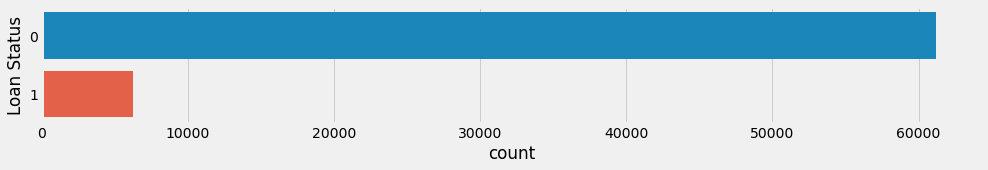

In [13]:
plt.figure(figsize= (15,2))
print(train['Loan Status'].value_counts())
ax = sns.countplot(y= 'Loan Status', data= train)

- Here we can see that there is a huge imbalance in the data. So we need to make sure that we have a good representation of the data. We will try different methods (*SMOTE*, *SMOTE_Tomek*, *Cross-Validation*) to overcome this.

- **FEATURE 1:** Loan Amount

In [14]:
train['Loan Amount'].dtype

dtype('int64')

In [15]:
train['Loan Amount'].describe()

count    67463.000000
mean     16848.902776
std       8367.865726
min       1014.000000
25%      10012.000000
50%      16073.000000
75%      22106.000000
max      35000.000000
Name: Loan Amount, dtype: float64

> Here we can see that the Maximum Loan Amount applied for was for 35000 and the Minimum was for 1014. Also the Average Amount is around 16000.

- The data does not seem to differ much from the Normal Distribution. This is because Mean ~= Median

- **FEATURE 2:** Funded Amount

In [16]:
train['Funded Amount'].dtype

dtype('int64')

In [17]:
train['Funded Amount'].describe()

count    67463.000000
mean     15770.599114
std       8150.992662
min       1014.000000
25%       9266.500000
50%      13042.000000
75%      21793.000000
max      34999.000000
Name: Funded Amount, dtype: float64

> The Maximum amount that was Funded was 34999 and the Minimum was 1014. Also the Average Amount Funded is around 15000.

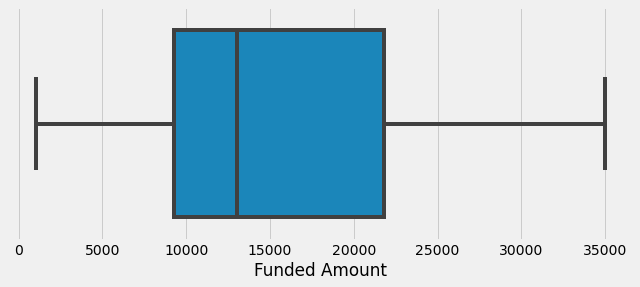

In [18]:
### Boxplot of Funded amount
plt.figure(figsize= (10,4))
ax = sns.boxplot(x= 'Funded Amount', data= train)

> - From the above visualization, we can tell that the data is Right Skewed (Median < Mean).
> - The mean of a Right-skewed Distribution is almost always greater than its median.

- **FEATURE 3:** Funded Amount Investor

In [19]:
train['Funded Amount Investor'].dtype

dtype('float64')

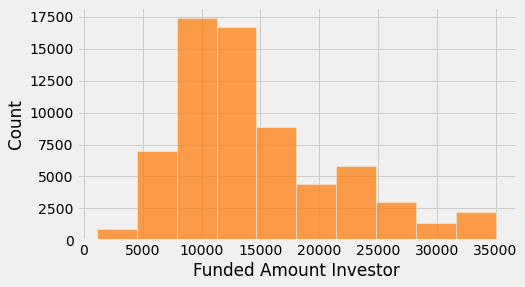

In [20]:
### Histogram Plot
plt.figure(figsize= (7,4))
ax = sns.histplot(train['Funded Amount Investor'], bins= 10, color= 'tab:orange')

In [21]:
train['Funded Amount Investor'].describe()

count    67463.000000
mean     14621.799323
std       6785.345170
min       1114.590204
25%       9831.684984
50%      12793.682170
75%      17807.594120
max      34999.746430
Name: Funded Amount Investor, dtype: float64

> - From the above analysis, we can tell that the data is Right Skewed (Median < Mean).

- **FEATURE 4:** Term

In [22]:
train['Term'].dtype

dtype('int64')

In [23]:
train['Term'].unique()

array([59, 36, 58], dtype=int64)

- Here we can see that the Term period ranges from 36 months (3 years) to 59 months (4 years and 11 months).

59    43780
58    22226
36     1457
Name: Term, dtype: int64


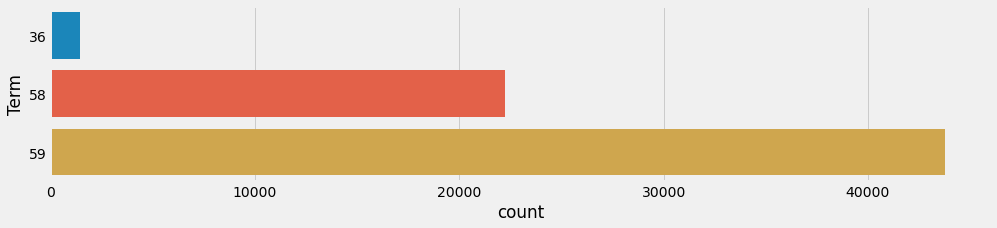

In [24]:
plt.figure(figsize= (15,3))
print(train['Term'].value_counts())
ax = sns.countplot(y= 'Term', data= train)

In [25]:
loan_per_term = train.groupby(['Term', 'Loan Status'])['Loan Status'].count()
loan_per_term

Term  Loan Status
36    0               1303
      1                154
58    0              20390
      1               1836
59    0              39529
      1               4251
Name: Loan Status, dtype: int64

> - We can see the Loan Defaulters are more in all Term Cases 

In [26]:
avgloan_per_term = train.groupby(['Term', 'Loan Status'])['Loan Amount'].mean()
avgloan_per_term

Term  Loan Status
36    0              16696.349962
      1              15875.402597
58    0              16841.602452
      1              16922.073529
59    0              16876.205571
      1              16680.461303
Name: Loan Amount, dtype: float64

> - Above we can see the Average Loans Applied for each Term and also by the Defaulter and Non-Defaulter class.

In [27]:
### Checking with Test Data
test['Term'].unique()

array([59, 58, 36, 60], dtype=int64)

> - Here we can see a new value in our test data. This needs to be checked. Since this is a *integer* we will ignore this for now. If needed we can remove this column.

- **FEATURE 5:** Batch Enrolled

In [28]:
train['Batch Enrolled'].dtype

dtype('O')

In [29]:
train['Batch Enrolled'].nunique()

41

In [30]:
train['Batch Enrolled'].value_counts().sort_values(ascending= False)[:5]

BAT3873588    3626
BAT1586599    3142
BAT1104812    2996
BAT2252229    2557
BAT2803411    2425
Name: Batch Enrolled, dtype: int64

> - Most number of recepients are Enrolled in batch ***BAT3873588***. 

In [31]:
### Check if the Batches are same for both train and test

for batch in train['Batch Enrolled'].unique():
    if batch in test['Batch Enrolled'].unique():
        pass
    else:
        print(f"{batch} is not present in both train and test")

In [32]:
train.groupby(['Batch Enrolled', 'Loan Status'])['Loan Amount'].mean()

Batch Enrolled  Loan Status
BAT1104812      0              16791.526882
                1              16372.167224
BAT1135695      0              16346.305019
                1              16220.756757
BAT1184694      0              16704.781576
                                   ...     
BAT5811547      1              15550.358209
BAT5849876      0              17087.705460
                1              16077.513889
BAT5924421      0              16776.733746
                1              15593.151786
Name: Loan Amount, Length: 82, dtype: float64

> - We can see that the first and last batch are having the Average Loan Amount approx to 16000 for both the Defaulters  and Non-Defaulters.

- **FEATURE 6:** Interest Rate

In [33]:
train['Interest Rate'].dtype

dtype('float64')

In [34]:
train['Interest Rate'].describe()

count    67463.000000
mean        11.846258
std          3.718629
min          5.320006
25%          9.297147
50%         11.377696
75%         14.193533
max         27.182348
Name: Interest Rate, dtype: float64

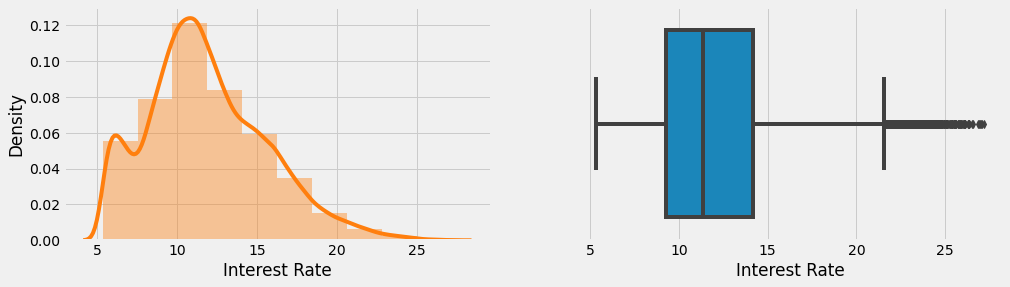

In [35]:
plt.figure(figsize= (15,4))

plt.subplot(1,2,1)
ax = sns.distplot(train['Interest Rate'], bins= 10, color= 'tab:orange')
plt.subplot(1,2,2)
ax = sns.boxplot(x= train['Interest Rate'])
plt.show()

> - Here we can see the outliers, but this is fine as the values will be different for each person.

- **FEATURE 7:** Grade

In [36]:
train['Grade'].dtype

dtype('O')

In [37]:
train['Grade'].unique()

array(['B', 'C', 'F', 'A', 'G', 'E', 'D'], dtype=object)

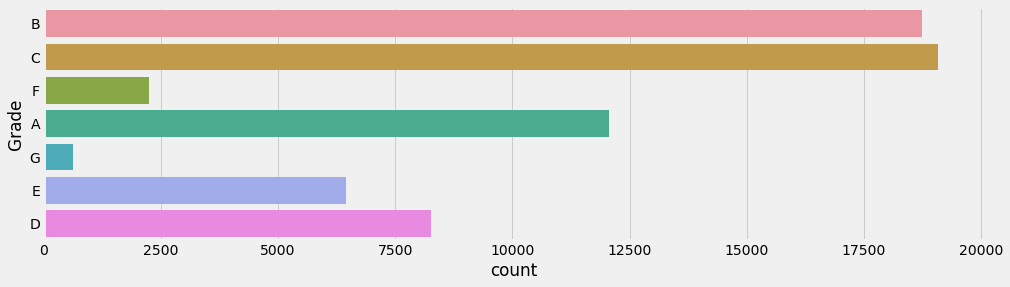

In [38]:
plt.figure(figsize= (15,4))
ax = sns.countplot(y= 'Grade', data= train, )

In [39]:
train.groupby(['Grade', 'Loan Status'])['Loan Status'].count()

Grade  Loan Status
A      0              10955
       1               1100
B      0              17107
       1               1635
C      0              17293
       1               1792
D      0               7463
       1                796
E      0               5828
       1                618
F      0               2013
       1                233
G      0                563
       1                 67
Name: Loan Status, dtype: int64

In [40]:
### Average Funded Amount for each Grade
train.groupby(['Grade'])['Funded Amount'].mean()

Grade
A    15858.974119
B    15831.625920
C    15617.068693
D    15681.575009
E    15841.287930
F    16140.807213
G    16039.020635
Name: Funded Amount, dtype: float64

- **FEATURE 8:** Sub Grade

In [41]:
train['Sub Grade'].dtype

dtype('O')

In [42]:
train.groupby(['Grade', 'Sub Grade', 'Loan Status'])['Loan Status'].count()[:15]

Grade  Sub Grade  Loan Status
A      A1         0              236
                  1               24
       A2         0              378
                  1               40
       A3         0              256
                  1               31
       A4         0              311
                  1               35
       A5         0              588
                  1               62
       B1         0              454
                  1               55
       B2         0              652
                  1               63
       B3         0              618
Name: Loan Status, dtype: int64

> - We will remove the Sub Grade column as it is not a useful feature. Also it is confusing as Representatives with grade A, have the Sub-Grade B1,b2, etc.

- **FEATURE 9:** Home Ownership

In [43]:
train['Home Ownership'].nunique() == test['Home Ownership'].nunique()

True

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Home Ownership, dtype: int64


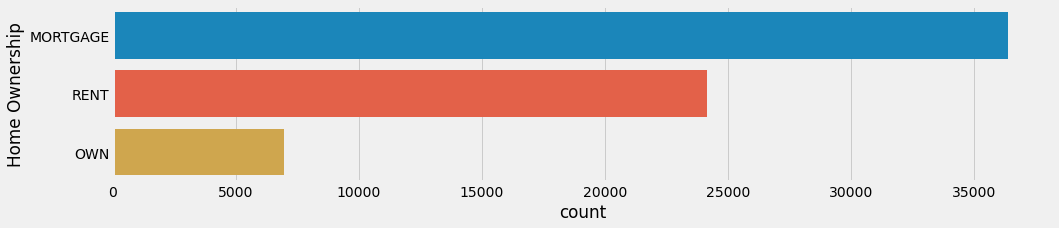

In [44]:
plt.figure(figsize= (15,3))
print(train['Home Ownership'].value_counts())
ax = sns.countplot(y= 'Home Ownership', data= train)

> - We can see that most of the Representatives are the ones who have Mortgaged their house

- **FEATURE 10:** Employment Duration

This column will be removed from the model. This is because it is not a senseable feature.

- **FEATURE 11:** Verification Status

In [45]:
train['Verification Status'].dtype

dtype('O')

In [46]:
train['Verification Status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64


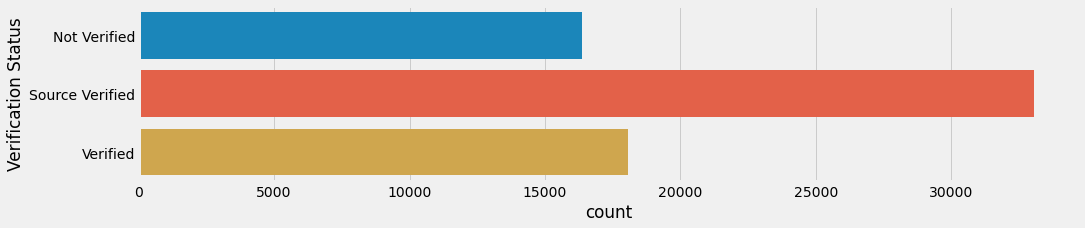

In [47]:
plt.figure(figsize= (15,3))
print(train['Verification Status'].value_counts())
ax = sns.countplot(y= 'Verification Status', data= train)

In [48]:
train.groupby(['Verification Status'])['Funded Amount'].mean()

Verification Status
Not Verified       16084.453728
Source Verified    15683.185495
Verified           15646.502821
Name: Funded Amount, dtype: float64

> - We can conclude that though there are more number of Representatives who are Source Verified or Verified, the Not Verified Representatives are the ones who has the highest Average Funded Amount.

- **FEATURE 12:** Payment Plan

In [49]:
train['Payment Plan'].dtype

dtype('O')

In [50]:
train['Payment Plan'].unique(), test['Payment Plan'].unique()

(array(['n'], dtype=object), array(['n'], dtype=object))

> - We can drop this column as there is only one value in the column.

- **FEATURE 13:** Loan Title

In [51]:
train['Loan Title'].dtype

dtype('O')

In [52]:
train['Loan Title'].nunique() == test['Loan Title'].nunique()

True

In [53]:
print(train['Loan Title'].unique())

['Debt Consolidation' 'Debt consolidation' 'Credit card refinancing'
 'Home improvement' 'Credit Consolidation' 'Green loan' 'Other'
 'Moving and relocation' 'Credit Cards' 'Medical expenses'
 'DEBT CONSOLIDATION' 'Home Improvement' 'Refinance'
 'credit card consolidation' 'Lending Club' 'Debt Consolidation Loan'
 'Major purchase' 'Vacation' 'Business' 'Credit card payoff'
 'Credit Card Consolidation' 'credit card' 'Credit Card Refi'
 'Personal Loan' 'CC Refi' 'consolidate' 'Medical' 'Loan 1'
 'Consolidation' 'Card Consolidation' 'Car financing' 'debt'
 'home improvement' 'debt consolidation' 'Home buying' 'Freedom'
 'Consolidate' 'Consolidated' 'get out of debt' 'consolidation loan'
 'Dept consolidation' 'Personal loan' 'Personal' 'Debt' 'cards' 'Cards'
 'Bathroom' 'refi' 'Credit Card Loan' 'Credit Card Debt' 'House'
 'Debt Consolidation 2013' 'debt loan' 'CC Refinance' 'Consolidation Loan'
 'Home' 'CC consolidation' 'Credit Card' 'Credit Card Refinance'
 'Credit Loan' 'payoff' 'Bill 

In [54]:
train.groupby(train['Loan Title'])[['ID', 'Total Revolving Credit Limit']].agg({'ID': 'count', 'Total Revolving Credit Limit': 'mean'}).sort_values(by= 'ID', ascending= False)[:10]

,ID,Total Revolving Credit Limit
Loan Title,,
Credit card refinancing,30728,22961.999186
Debt consolidation,24841,23044.495672
Debt Consolidation,3544,23640.187641
Other,2455,22635.801629
Home improvement,2211,23504.935323
Major purchase,487,24355.248460
Medical expenses,237,25021.375527
Business,183,26833.071038
Moving and relocation,157,22107.388535


> - We will not be using the colum as there is no useful information in it.

- **FEATURE 14:** Debit to Income

In [55]:
train['Debit to Income'].dtype

dtype('float64')

In [56]:
train['Debit to Income'].describe()

count    67463.000000
mean        23.299241
std          8.451824
min          0.675299
25%         16.756416
50%         22.656658
75%         30.048400
max         39.629862
Name: Debit to Income, dtype: float64

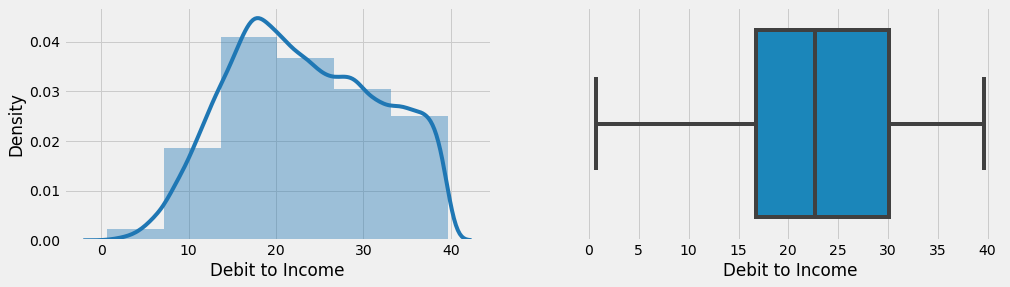

In [57]:
plt.figure(figsize= (15,4))

plt.subplot(1,2,1)
ax = sns.distplot(train['Debit to Income'], bins= 6, color= 'tab:blue')
plt.subplot(1,2,2)
ax = sns.boxplot(x= train['Debit to Income'])
plt.show()

- **FEATURE 15:** Delinquency - two years

In [58]:
train['Delinquency - two years'].dtype

dtype('int64')

In [59]:
train['Delinquency - two years'].nunique() == test['Delinquency - two years'].nunique()

False

In [60]:
train['Delinquency - two years'].unique(), test['Delinquency - two years'].unique()

(array([1, 0, 3, 6, 2, 7, 5, 4, 8], dtype=int64),
 array([1, 0, 6, 2, 7, 3, 5, 8, 4, 9], dtype=int64))

In [61]:
train['Delinquency - two years'] = pd.cut(train['Delinquency - two years'], bins= 2, labels= ['<5', '>5'])
test['Delinquency - two years'] = pd.cut(test['Delinquency - two years'], bins= 2, labels= ['<5', '>5'])

<5    66902
>5      561
Name: Delinquency - two years, dtype: int64


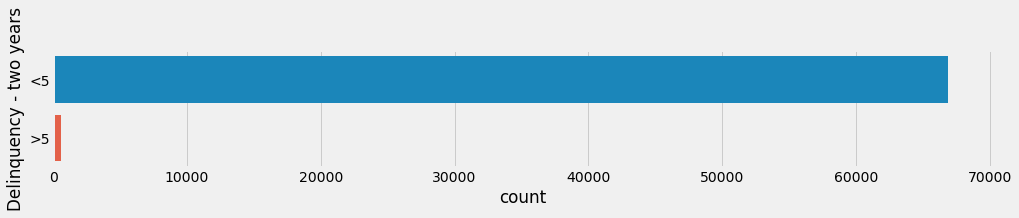

In [62]:
plt.figure(figsize= (15,2))
print(train['Delinquency - two years'].value_counts())
ax = sns.countplot(y= 'Delinquency - two years', data= train)

> - A majority of our Respondents has had less than 5, 30+ days Delinquency in past 2 years.

- **FEATURE 16:** Inquires - six months

In [63]:
train['Inquires - six months'].dtype

dtype('int64')

In [64]:
train['Inquires - six months'].nunique() == test['Inquires - six months'].nunique()

True

In [65]:
train['Inquires - six months'].unique()

array([0, 3, 2, 1, 4, 5], dtype=int64)

> - It is always good that we enquire. It means that the customer is asking for more information. And they are interested.

- **FEATURE 17:** Open Account

In [66]:
train['Open Account'].dtype

dtype('int64')

In [67]:
train['Open Account'].nunique() == test['Open Account'].nunique()

True

In [68]:
train['Open Account'].unique()

array([13, 12, 14,  7, 16, 11,  6, 17, 10,  8,  9, 26, 31, 28, 19, 15, 33,
       30, 21, 18, 27, 20, 25, 24, 23, 22, 34, 32, 29,  5,  4, 36, 35,  3,
       37,  2], dtype=int64)

- **FEATURE 18:** Public Record 

In [69]:
train['Public Record'].dtype

dtype('int64')

In [70]:
train['Public Record'].nunique() == test['Public Record'].nunique()

True

In [71]:
train['Public Record'].unique()

array([0, 1, 2, 4, 3], dtype=int64)

- **FEATURE 19:** Revolving Balance

In [72]:
train['Revolving Balance'].dtype

dtype('int64')

In [73]:
train['Revolving Balance'].describe()

count     67463.000000
mean       7699.342425
std        7836.148190
min           0.000000
25%        2557.000000
50%        5516.000000
75%       10184.500000
max      116933.000000
Name: Revolving Balance, dtype: float64

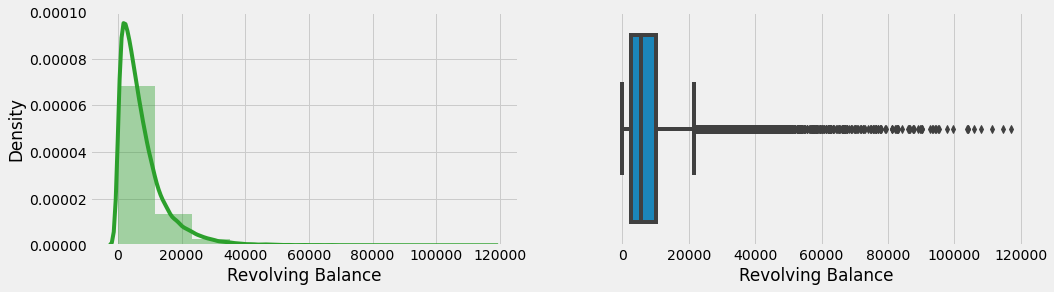

In [74]:
plt.figure(figsize= (15,4))

plt.subplot(1,2,1)
ax = sns.distplot(train['Revolving Balance'], bins= 10, color= 'tab:green')
plt.subplot(1,2,2)
ax = sns.boxplot(x= train['Revolving Balance'])
plt.show()

- **FEATURE 20:** Revolving Utilities

In [75]:
train['Revolving Utilities'].dtype

dtype('float64')

In [76]:
train['Revolving Utilities'].describe()

count    67463.000000
mean        52.889443
std         22.539450
min          0.005172
25%         38.658825
50%         54.082334
75%         69.177117
max        100.880050
Name: Revolving Utilities, dtype: float64

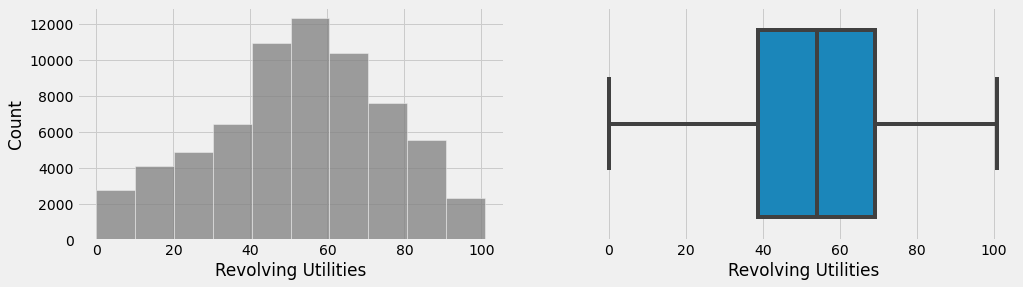

In [77]:
plt.figure(figsize= (15,4))

plt.subplot(1,2,1)
ax = sns.histplot(train['Revolving Utilities'], bins= 10, color= 'tab:grey')
plt.subplot(1,2,2)
ax = sns.boxplot(x= train['Revolving Utilities'])
plt.show()

- **FEATURE 21:** Total Accounts

In [78]:
train['Total Accounts'].dtype

dtype('int64')

In [79]:
train['Total Accounts'].nunique() == test['Total Accounts'].nunique()

False

In [80]:
train['Total Accounts'].describe()

count    67463.000000
mean        18.627929
std          8.319246
min          4.000000
25%         13.000000
50%         18.000000
75%         23.000000
max         72.000000
Name: Total Accounts, dtype: float64

In [81]:
train['Total Accounts'] = pd.cut(train['Total Accounts'], bins= 4, labels= ['<20', '20-40', '40-60', '>60'])
test['Total Accounts'] = pd.cut(test['Total Accounts'], bins= 4, labels= ['<20', '20-40', '40-60', '>60'])

- **FEATURE 22:** Initial List Status

In [82]:
train['Initial List Status'].dtype

dtype('O')

In [83]:
train['Initial List Status'].unique()

array(['w', 'f'], dtype=object)

w    36299
f    31164
Name: Initial List Status, dtype: int64


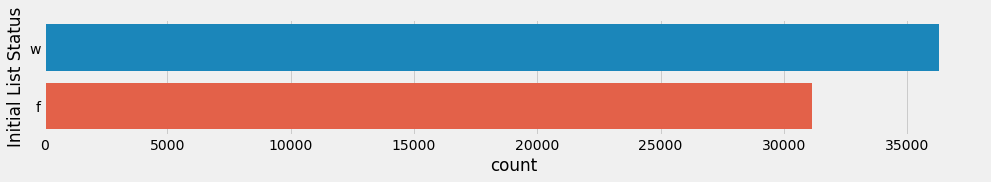

In [84]:
plt.figure(figsize= (15,2))
print(train['Initial List Status'].value_counts())
ax = sns.countplot(y= 'Initial List Status', data= train)

In [85]:
train.groupby(['Initial List Status', 'Loan Status'])['Loan Amount'].mean()

Initial List Status  Loan Status
f                    0              16838.357869
                     1              16742.021566
w                    0              16880.000423
                     1              16722.010226
Name: Loan Amount, dtype: float64

> - Here we can understand that Respondents with Initial List Status as "Waiting" have Defaulters who have applied for a loan of approximately 17000 on average.

- **FEATURE 23:** Total Received Interest

In [86]:
train['Total Received Interest'].dtype

dtype('float64')

In [87]:
train['Total Received Interest'].describe()

count    67463.000000
mean      2068.992542
std       2221.918745
min          4.736746
25%        570.903814
50%       1330.842771
75%       2656.956837
max      14301.368310
Name: Total Received Interest, dtype: float64

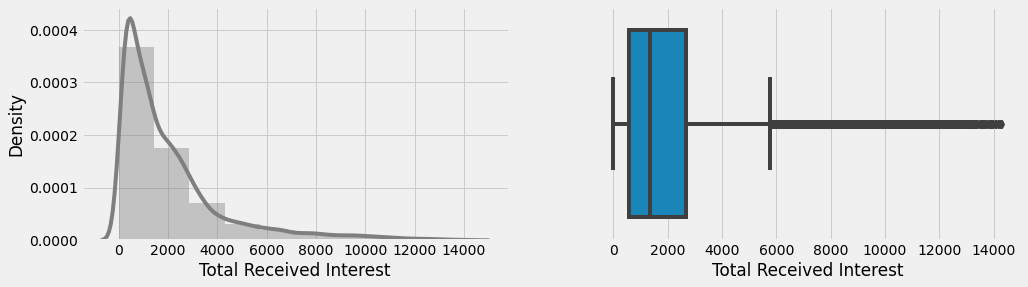

In [88]:
plt.figure(figsize= (15,4))

plt.subplot(1,2,1)
ax = sns.distplot(train['Total Received Interest'], bins= 10, color= 'tab:grey')
plt.subplot(1,2,2)
ax = sns.boxplot(x= train['Total Received Interest'])
plt.show()

- **FEATURE 24:** Total Received Late Fee

In [89]:
train['Total Received Late Fee'].describe()

count    67463.000000
mean         1.143969
std          5.244365
min          0.000003
25%          0.021114
50%          0.043398
75%          0.071884
max         42.618882
Name: Total Received Late Fee, dtype: float64

> - The values kind of seems not to be exact. But it is not a huge issue.

- **FEATURE 25:** Recoveries

In [90]:
train['Recoveries'].dtype

dtype('float64')

In [91]:
train['Recoveries'].describe()

count    67463.000000
mean        59.691578
std        357.026346
min          0.000036
25%          1.629818
50%          3.344524
75%          5.453727
max       4354.467419
Name: Recoveries, dtype: float64

- **FEATURE 26:** Collection Recovery Fee

In [92]:
train['Collection Recovery Fee'].describe()

count    67463.000000
mean         1.125141
std          3.489885
min          0.000036
25%          0.476259
50%          0.780141
75%          1.070566
max        166.833000
Name: Collection Recovery Fee, dtype: float64

- **FEATURE 27:** Collection 12 months Medical

In [93]:
train['Collection 12 months Medical'].describe()

count    67463.000000
mean         0.021301
std          0.144385
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Collection 12 months Medical, dtype: float64

In [94]:
train['Collection 12 months Medical'].nunique() == test['Collection 12 months Medical'].nunique()

True

In [95]:
train['Collection 12 months Medical'].unique()

array([0, 1], dtype=int64)

0    66026
1     1437
Name: Collection 12 months Medical, dtype: int64


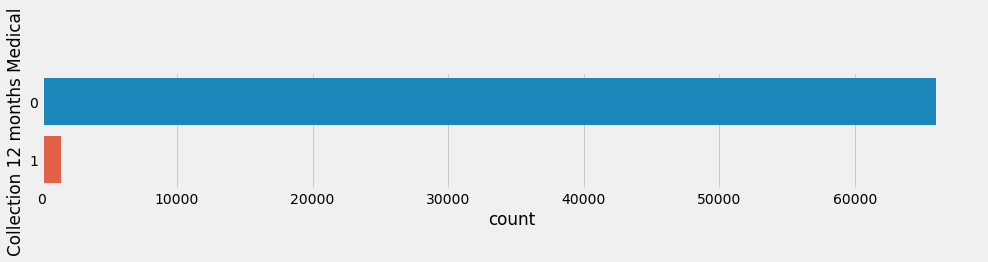

In [96]:
plt.figure(figsize= (15,2))
print(train['Collection 12 months Medical'].value_counts())
ax = sns.countplot(y= 'Collection 12 months Medical', data= train)

- **FEATURE 28:** Application Type

In [97]:
train['Application Type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [98]:
train['Application Type'].nunique() == test['Application Type'].nunique()

True

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64


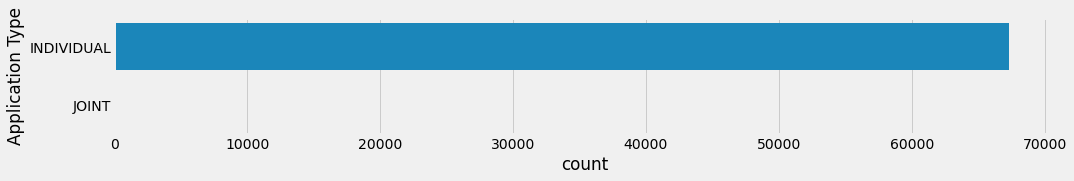

In [99]:
plt.figure(figsize= (15,2))
print(train['Application Type'].value_counts())
ax = sns.countplot(y= 'Application Type', data= train)

In [100]:
train.groupby(['Application Type', 'Loan Status'])['Loan Status'].count()/train.groupby(['Application Type'])['Loan Status'].count()

Application Type  Loan Status
INDIVIDUAL        0              0.907484
                  1              0.092516
JOINT             0              0.910569
                  1              0.089431
Name: Loan Status, dtype: float64

In [101]:
train.groupby(['Application Type'])['Loan Amount'].mean()

Application Type
INDIVIDUAL    16847.561524
JOINT         17583.211382
Name: Loan Amount, dtype: float64

> - Hence Joint Application Type Respresentatives have the highest Average Loan Amount also they are the group that has the highest percentage of Defaulters.

- **FEATURE 29:** Last week Pay

In [102]:
train['Last week Pay'].dtype

dtype('int64')

In [103]:
train['Last week Pay'].nunique() == test['Last week Pay'].nunique()

True

In [104]:
train['Last week Pay'].describe()

count    67463.000000
mean        71.163260
std         43.315845
min          0.000000
25%         35.000000
50%         68.000000
75%        105.000000
max        161.000000
Name: Last week Pay, dtype: float64

- **FEATURE 30:** Accounts Delinquent

In [105]:
train['Accounts Delinquent'].nunique() == test['Accounts Delinquent'].nunique()

False

In [106]:
train['Accounts Delinquent'].unique()

array([0], dtype=int64)

> - We will drop this column as well

- **FEATURE 31:** Total Collection Amount

In [107]:
train['Total Collection Amount'].dtype

dtype('int64')

In [108]:
train['Total Collection Amount'].describe()

count    67463.000000
mean       146.467990
std        744.382233
min          1.000000
25%         24.000000
50%         36.000000
75%         46.000000
max      16421.000000
Name: Total Collection Amount, dtype: float64

- **FEATURE 32:** Total Current Balance

In [109]:
train['Total Current Balance'].dtype

dtype('int64')

In [110]:
train['Total Current Balance'].describe()

count    6.746300e+04
mean     1.595739e+05
std      1.390332e+05
min      6.170000e+02
25%      5.037900e+04
50%      1.183690e+05
75%      2.283750e+05
max      1.177412e+06
Name: Total Current Balance, dtype: float64

- **FEATURE 33:** Total Revolving Credit Limit

In [111]:
train['Total Revolving Credit Limit'].describe()

count     67463.000000
mean      23123.005544
std       20916.699999
min        1000.000000
25%        8155.500000
50%       16733.000000
75%       32146.500000
max      201169.000000
Name: Total Revolving Credit Limit, dtype: float64

##### Remove Unnecessary Columns

In [112]:
train.drop(columns= ['ID', 'Term', 'Batch Enrolled', 'Employment Duration', 'Sub Grade', 'Payment Plan', 'Loan Title', 'Accounts Delinquent'], inplace= True)
test.drop(columns= ['ID', 'Term', 'Batch Enrolled', 'Employment Duration', 'Sub Grade', 'Payment Plan', 'Loan Title', 'Accounts Delinquent'], inplace= True)

In [113]:
train.sample(5)

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Grade,Home Ownership,Verification Status,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
24868,16454,10742,2983.888167,6.676572,E,RENT,Not Verified,5.032503,<5,1,12,0,10017,32.912732,<20,f,10943.698100,0.048221,1.841438,0.018914,0,INDIVIDUAL,99,29,175491,20641,0
50393,20811,11170,9063.603385,7.558574,B,OWN,Not Verified,35.520560,<5,0,13,0,10089,99.730644,<20,w,1550.937796,0.047971,3.374312,0.514606,0,INDIVIDUAL,160,36,80208,3206,0
37921,14459,23544,9555.311869,8.804363,C,MORTGAGE,Verified,27.304388,<5,0,10,0,718,19.341641,<20,w,306.040006,0.034742,6.830157,0.961732,0,INDIVIDUAL,24,21,14273,8340,0
39502,8239,15469,28833.244400,16.203839,B,MORTGAGE,Not Verified,22.002880,<5,1,10,0,3658,52.012639,<20,w,1549.617936,0.032448,0.677651,0.036945,0,INDIVIDUAL,88,3,198328,2760,0
54240,8342,7257,22430.319070,9.550028,B,RENT,Verified,30.358766,<5,0,10,0,7978,56.005267,20-40,w,1148.190764,0.041758,2.377883,0.470326,0,INDIVIDUAL,53,14,127913,23009,0


In [114]:
train.shape, test.shape

((67463, 27), (28913, 27))

#### Feature Encoding
We will ignore Feature Scaling as we are going to work with Random Forest and possibly Boosting Trees Algorithm.

In [115]:
#### Converting Categorical Column to Object: https://stackoverflow.com/questions/68884301/typeerror-data-type-category-not-understood-pandas-dataframe

for column in train.columns:
    if pd.api.types.is_categorical_dtype(train[column]):
        train[column] = train[column].astype('object')

for column in test.columns:
    if pd.api.types.is_categorical_dtype(test[column]):
        test[column] = test[column].astype('object')

In [116]:
categorical_columns = [feature for feature in train.columns if train[feature].dtype == 'object']
categorical_columns

['Grade',
 'Home Ownership',
 'Verification Status',
 'Delinquency - two years',
 'Total Accounts',
 'Initial List Status',
 'Application Type']

In [117]:
loan_train = train.copy()
loan_test = test.copy()

##### 1. Ordinal Encoding

In [118]:
from sklearn.preprocessing import OrdinalEncoder

In [119]:
encoder1 = OrdinalEncoder()

loan_train['Grade'] = encoder1.fit_transform(loan_train['Grade'].values.reshape(-1,1))
loan_test['Grade'] = encoder1.transform(loan_test['Grade'].values.reshape(-1,1))

loan_train['Delinquency - two years'] = encoder1.fit_transform(loan_train['Delinquency - two years'].values.reshape(-1,1))
loan_test['Delinquency - two years'] = encoder1.transform(loan_test['Delinquency - two years'].values.reshape(-1,1))

loan_train['Total Accounts'] = loan_train['Total Accounts'].replace(['<20', '20-40', '40-60', '>60'], [0,1,2,3])
loan_test['Total Accounts'] = loan_test['Total Accounts'].replace(['<20', '20-40', '40-60', '>60'], [0,1,2,3])

In [120]:
loan_train['Grade'] = loan_train['Grade'].astype(int)
loan_train['Delinquency - two years'] = loan_train['Delinquency - two years'].astype(int)

In [121]:
loan_test['Grade'] = loan_test['Grade'].astype(int)
loan_test['Delinquency - two years'] = loan_test['Delinquency - two years'].astype(int)

##### 2. Mean Encoding

In [122]:
[feature for feature in loan_train.columns if loan_train[feature].dtype == 'object']

['Home Ownership',
 'Verification Status',
 'Initial List Status',
 'Application Type']

In [123]:
encod_type = loan_train.groupby('Home Ownership')['Loan Status'].mean()
loan_train.loc[:, 'Ownership_enc'] = loan_train['Home Ownership'].map(encod_type)
loan_test.loc[:, 'Ownership_enc'] = loan_test['Home Ownership'].map(encod_type)
loan_train[['Home Ownership','Ownership_enc']].value_counts()

Home Ownership  Ownership_enc
MORTGAGE        0.088663         36351
RENT            0.095694         24150
OWN             0.101551          6962
dtype: int64

In [124]:
encod_type = loan_train.groupby('Verification Status')['Loan Status'].mean()
loan_train.loc[:, 'Verification_enc'] = loan_train['Verification Status'].map(encod_type)
loan_test.loc[:, 'Verification_enc'] = loan_test['Verification Status'].map(encod_type)
loan_train[['Verification Status','Verification_enc']].value_counts()

Verification Status  Verification_enc
Source Verified      0.093383            33036
Verified             0.091271            18078
Not Verified         0.092116            16349
dtype: int64

In [125]:
encod_type = loan_train.groupby('Initial List Status')['Loan Status'].mean()
loan_train.loc[:, 'Initial_enc'] = loan_train['Initial List Status'].map(encod_type)
loan_test.loc[:, 'Initial_enc'] = loan_test['Initial List Status'].map(encod_type)
loan_train[['Initial List Status','Initial_enc']].value_counts()

Initial List Status  Initial_enc
w                    0.088901       36299
f                    0.096714       31164
dtype: int64

In [126]:
encod_type = loan_train.groupby('Application Type')['Loan Status'].mean()
loan_train.loc[:, 'Application_enc'] = loan_train['Application Type'].map(encod_type)
loan_test.loc[:, 'Application_enc'] = loan_test['Application Type'].map(encod_type)
loan_train[['Application Type','Application_enc']].value_counts()

Application Type  Application_enc
INDIVIDUAL        0.092516           67340
JOINT             0.089431             123
dtype: int64

In [127]:
loan_train.drop(columns= ['Home Ownership', 'Verification Status', 'Initial List Status', 'Application Type'], inplace= True)
loan_test.drop(columns= ['Home Ownership', 'Verification Status', 'Initial List Status', 'Application Type'], inplace= True)

In [128]:
loan_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Grade,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Ownership_enc,Verification_enc,Initial_enc,Application_enc
0,10000,32236,12329.36286,11.135007,1,16.284758,0,0,13,0,24246,74.932551,0,2929.646315,0.102055,2.498291,0.793724,0,49,31,311301,6619,0,0.088663,0.092116,0.088901,0.092516
1,3609,11940,12191.99692,12.237563,2,15.412409,0,0,12,0,812,78.297186,0,772.769385,0.036181,2.377215,0.974821,0,109,53,182610,20885,0,0.095694,0.093383,0.096714,0.092516
2,28276,9311,21603.22455,12.545884,5,28.137619,0,0,14,0,1843,2.073040,0,863.324396,18.778660,4.316277,1.020075,0,66,34,89801,26155,0,0.088663,0.093383,0.088901,0.092516
3,11170,6954,17877.15585,16.731201,2,18.043730,0,0,7,0,13819,67.467951,0,288.173196,0.044131,0.107020,0.749971,0,39,40,9189,60214,0,0.088663,0.093383,0.088901,0.092516
4,16890,13226,13539.92667,15.008300,2,17.209886,0,3,13,1,1544,85.250761,1,129.239553,19.306646,1294.818751,0.368953,0,18,430,126029,22579,0,0.088663,0.093383,0.088901,0.092516


#### Model Building

In [129]:
from sklearn.model_selection import StratifiedKFold
StratifiedKF = StratifiedKFold(n_splits= 20, shuffle=True, random_state=1)

In [130]:
X= loan_train.drop(columns= ['Loan Status'])
y= loan_train['Loan Status']

In [131]:
### Splitting the data into train and test through Stratified Cross Validation (Imbalanced data)
for train_index, test_index in StratifiedKF.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index,:]
    y_train, y_test = y[train_index], y[test_index]

**REFERENCE: https://analyticsindiamag.com/hands-on-tutorial-on-performance-measure-of-stratified-k-fold-cross-validation/**

In [132]:
X_train.shape, X_test.shape

((64090, 26), (3373, 26))

**Random Forest Model (No Tuning)**

In [133]:
from sklearn.metrics import log_loss, accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier

In [134]:
model1 = RandomForestClassifier()

In [135]:
model1.fit(X_train, y_train)
CV_train_pred = cross_val_predict(model1, X_train, y_train, cv= 10, n_jobs=-1)
train_accuracy = round(accuracy_score(y_train, CV_train_pred)*100, 2)

y_pred = model1.predict(X_test)
test_accuracy = round(accuracy_score(y_test, y_pred)*100, 2)

In [136]:
print(f"Training Accuracy: {train_accuracy}%")
print(f"Testing Accuracy: {test_accuracy}%")

Training Accuracy: 90.75%
Testing Accuracy: 90.75%


In [165]:
y_pred_clipped = np.clip(y_pred, 0.025, 0.975)
log_loss(y_test, y_pred_clipped)

0.3641945448928134

### Submission Prediction

In [143]:
loan_test.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Interest Rate,Grade,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status,Ownership_enc,Verification_enc,Initial_enc,Application_enc
0,17120,10365,16025.082690,12.163926,0,16.749219,0,0,12,1,3576,67.278287,0,4469.449851,0.088031,8.425776,0.731797,0,135,24,475442,4364,NaN,0.095694,0.093383,0.096714,0.092516
1,7133,11650,12615.795600,6.564296,1,18.157975,0,0,11,0,1932,71.313157,0,993.907530,0.041237,6.157008,0.992918,0,56,1,72412,2573,NaN,0.088663,0.093383,0.088901,0.092516
2,25291,25825,11621.280830,14.729900,0,15.190011,0,0,22,0,598,50.883065,1,729.113379,0.021745,5.705077,0.281580,0,3,26,284825,19676,NaN,0.088663,0.093383,0.096714,0.092516
3,30781,9664,15375.823510,10.523767,0,21.292550,0,0,11,0,5222,82.449083,1,715.867091,0.092398,2.469688,0.959162,0,21,32,40842,7226,NaN,0.095694,0.091271,0.088901,0.092516
4,8878,9419,7176.647582,9.997013,2,4.812117,0,0,11,0,553,49.075855,0,248.572854,0.010354,2.127835,0.402315,0,104,33,90825,26145,NaN,0.101551,0.091271,0.088901,0.092516


In [144]:
model1.fit(X, y)
y_pred_new = model1.predict(loan_test.drop(columns= ['Loan Status']))
y_pred_final = np.clip(y_pred_new, 0.025, 0.975)

In [155]:
Predictions = pd.DataFrame(y_pred_final, columns=['Loan_Status'])

In [156]:
Predictions.Loan_Status.value_counts()

0.025    28766
0.975      147
Name: Loan_Status, dtype: int64

In [163]:
Predictions.to_csv('Submission1.csv', index= False)